In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
from NN_Class import NN

def Graph_Confusion_Matrix(CM, labels):
    #np.fill_diagonal(CM,0)
    
    plt.figure(figsize = (8,8))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(CM, annot=True,annot_kws={"size": 16}, fmt='g'
               ,xticklabels = labels
               ,yticklabels = labels)# font size
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

In [3]:
Path = "C:\\Users\\Jack\\OneDrive\Kaggle\\Digit_Recogniser\\train.csv"
Path_Test = "C:\\Users\\Jack\\OneDrive\Kaggle\\Digit_Recogniser\\test.csv"

In [4]:
df_train = pd.read_csv(Path)
#This randomise the trainning data (frac = 1 is sample of 100%)
df_train = df_train.sample(frac=1).reset_index(drop=True)

df_test = pd.read_csv(Path_Test)

y_ = df_train["label"].copy()
X_ = df_train.copy()
X_.drop(columns=["label"], inplace=True)

y_ = pd.get_dummies(y_)

In [5]:
#Pandas Dataframe to Numpy array
X_ = X_.values
y_ = y_.values

#Normalisation
X_norm = X_/255.0

In [6]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_, test_size=0.20, random_state=42)

We want to select the number of layers and the nodes in each layer. First layer is number of pixels last layer is 10 for number of labels

In [13]:
layers = [X_train.shape[1],250 ,10]     

In [15]:
Neural_N   = NN(X = X_train,
                y = y_train,
                layers = layers,
                alpha = 0.1,
                batch_size = 256,
                n_epochs = 25)

Train the neural network

In [16]:
Cost_Train = Neural_N.Fit()

Cost at epoch0 Cost:1.322681443189906
Cost at epoch1 Cost:0.4913315097890372
Cost at epoch2 Cost:0.38702259875546974
Cost at epoch3 Cost:0.34718004843071276
Cost at epoch4 Cost:0.3244123042062771
Cost at epoch5 Cost:0.3086845644108858
Cost at epoch6 Cost:0.2964813129225383
Cost at epoch7 Cost:0.2862000507478748
Cost at epoch8 Cost:0.277008490350759
Cost at epoch9 Cost:0.268443602260085
Cost at epoch10 Cost:0.26024288007267116
Cost at epoch11 Cost:0.25226491552201785
Cost at epoch12 Cost:0.24444712211167485
Cost at epoch13 Cost:0.23677810024383944
Cost at epoch14 Cost:0.22927610386266276
Cost at epoch15 Cost:0.22197221118738794
Cost at epoch16 Cost:0.21489856259317167
Cost at epoch17 Cost:0.20808152193960497
Cost at epoch18 Cost:0.201538896042306
Cost at epoch19 Cost:0.19527983181135491
Cost at epoch20 Cost:0.18930600158644825
Cost at epoch21 Cost:0.18361317365952215
Cost at epoch22 Cost:0.17819274742627794
Cost at epoch23 Cost:0.17303309356542618
Cost at epoch24 Cost:0.1681206660491530

Visualise the cost per epoch

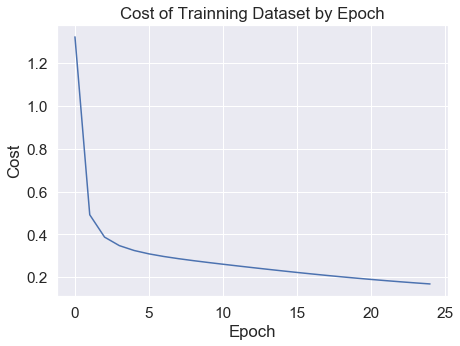

In [17]:
plt.figure(figsize=(7,5))            
plt.plot(Cost_Train)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost of Trainning Dataset by Epoch")
plt.show()

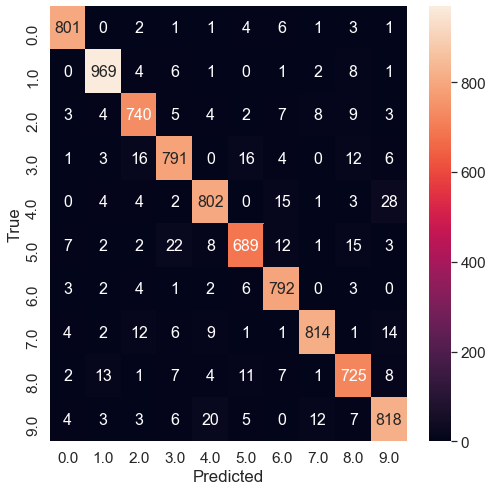

Accuary: 94.53571428571429


In [18]:
Y_pred = np.argmax(Neural_N.Predict(X_test), axis=0)
Y_actual = np.argmax(y_test,axis=1)

CM = confusion_matrix(Y_actual, Y_pred)
Graph_Confusion_Matrix(CM, list(np.linspace(0,9,10)))
print("Accuary:", accuracy_score(Y_actual, Y_pred)*100)

3x3 grid of test images with their predicted labels

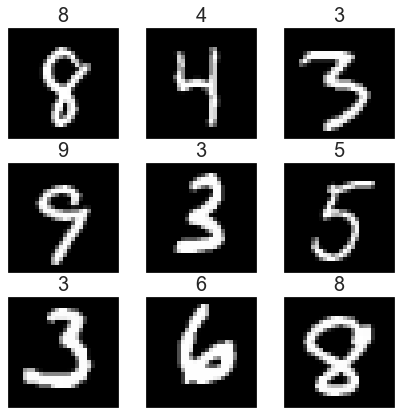

In [19]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(7,7))

count = 0
for i in range (0,9):

    ax[i//3, count].imshow(X_test[i].reshape(28,28), cmap="gray")
    ax[i//3, count].set_yticks([])
    ax[i//3, count].set_xticks([])
    ax[i//3, count].set_title(Y_pred[i],size=20)
    
    count = count +1
    if count == 3: count = 0